<a href="https://colab.research.google.com/github/poudyaldiksha/Data-Science-project/blob/main/Lesson_66_b2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 66: Polynomial Regression - Underfitting & Overfitting



In this class, you will understand the use of polynomials in Machine learning. You will learn to create Polynomial Regression Model and explore the Underfitting and Overfitting scenarios in polynomial regression model.

---

####Activity 1: Underfitting

In the supervised machine learning algorithms, models are evaluated based on learning the trends for the training data to predict the target function for the seen and unseen data.

Generalisation refers to how well the model is trained to predict or classify the target for the unseen data.

The techniques to evaluate how well our machine learning model learns and generalises to the new data are known as **underfitting** and **overfitting**.


Let's start with underfitting. For example, go back to the items produced vs workers example mentioned in the previous lesson.


|No. of Workers|Items Produced|
|-|-|
|1|400|
|2|700|
|3|900|
|4|1000|
|5|1050|
|6|1075|

The relationship between the items produced (dependent variable) and number of workers (independent variable) looks like this:

<center><img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/underfitting.png'></center>



The above graph clearly indicates that even the best fit linear regression line is not able to trace the pattern of the data. That means a linear regression model is not suitable for this kind of data. This situation is known as **Underfitting**.

Underfitting is a scenario where the model is not complex enough to generalise the pattern between the training data points to calculate the target. This result in inaccurate predictions.

Underfitting is easy to detect. Let's create some data and train an ML model to examine underfitting on it.
Underfitting is easy to detect. Let's create some data and train an ML model to examine underfitting on it.

**Note:** For understanding underfitting and overfitting, we will intentionally use a 4-degree polynomial function to create a dummy dataset. However, the actual datasets may not possess polynomial relationship among its variables.

Perform the following tasks to generate a noisy and distorted signal:

1. Use `np.random.seed()` function so that we can obtain same random numbers on multiple executions of the code.

  **Syntax:** `numpy.random.seed(seed_value)` where `seed_value` is an integer for which the random numbers are generated.

2. Define an `X` array having values between `0` and `5` such that the difference between two consecutive values is `0.01`.

3. Define another array `y` whose values are calculated using following polynomial function:

  $$y = f(X) = 0.5X^4 + 2X^3 - 4 X^2 - X - 50$$

  We have arbitrarily chosen this polynomial function. You could choose any other arbitrary polynomial function.
  
4. Define an array `noise` having random numbers equal to the length of `X` array. Generate these random numbers using `numpy.random.randn()` function  and  then multiply them by `50` to add some distortion to the signal.  
  
  The `numpy.random.randn()` function creates an array of specified shape and fills it with random values as per standard normal distribution.

  **Syntax:** `numpy.random.randn(shape)`

  where, `shape` is the shape of the original array for which noisy signal is to be generated.

4. Add the original `y` array and `noise` array to get a noisy and distorted signal as follows:

    `y = y + noise`


5. Create a scatter plot between `X` and `y` arrays to visualise their relation.


In [ ]:
noise =  np.random.randn(len(X))* 50
noise

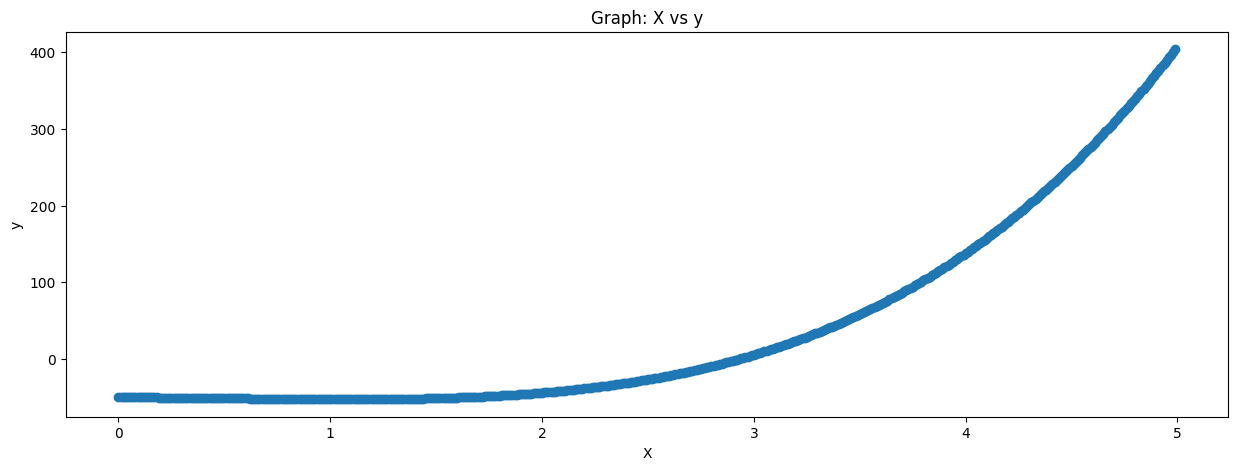

In [ ]:
#Visualise relationship between X and y arrays where 'y = f(X) + noise'

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
# Create the 'X' and 'y' array where y = f(X) + noise.

X = np.arange(0, 5, 0.01)
y = 0.5 * (X**4) + 2 * (X**3) - 4* (X**2) - X - 50
#noise = 50 * np.random.randn(len(X))
#y = y + noise

# Create the scatter plot to visualise the relation between 'X' and 'y'.
plt.figure(figsize = (15, 5))
plt.title("Graph: X vs y")
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(X, y)
plt.show()

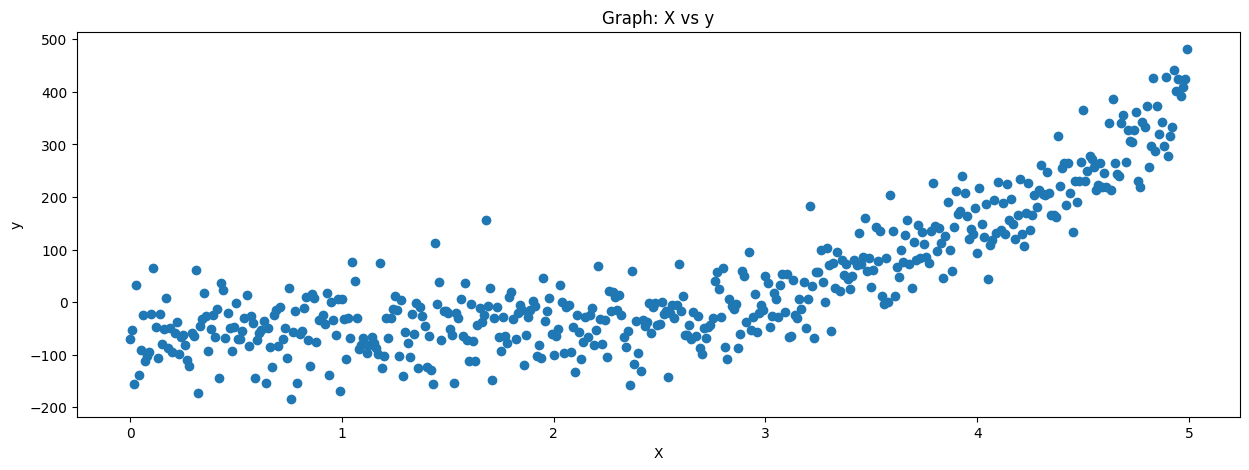

In [ ]:
#Visualise relationship between X and y arrays where 'y = f(X) + noise'

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
# Create the 'X' and 'y' array where y = f(X) + noise.

X = np.arange(0, 5, 0.01)
y = 0.5 * (X**4) + 2 * (X**3) - 4* (X**2) - X - 50
noise = 50 * np.random.randn(len(X))
y = y + noise

# Create the scatter plot to visualise the relation between 'X' and 'y'.
plt.figure(figsize = (15, 5))
plt.title("Graph: X vs y")
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(X, y)
plt.show()

As you can observe, the relationship between `X` and `y` arrays does not appear to be linear, rather it is more curvilinear.

**Note:** Although we are generating random numbers, we will obtain same graph even if we execute the above code multiple times. This is because of `random.seed()` function.

Now consider `X` as feature variable and `y` as target variable and split them into train and test sets using the `train_test_split()` function. Also visualise both train and test set arrays.


Follow the steps given below to create a scatter plot for  train and test sets side by side using the `subplots()` function:

1. Call the `subplots()` function on an object of `matplotlib.pyplot` and unpack the figure and axis objects in two different variables, say `fig` and `axis`. Inside the `subplots()` function, pass:

  - `nrows = 1` and `ncols = 2` parameters to create a figure having 1 row and 2 columns.

  - `figsize = (15, 5)` parameter to create the figure of 15 units wide and 5 units high.

  - `dpi = 96` parameter to further enlarge the figure based on their pixel density.

- Construct a scatter plot to visualise the relation between `X_train` and `y_train` using first subplot's axes i.e `axis[0]` as follows:
   
   `axis[0].scatter(X_train, y_train)`.

- Also call the `set()` function using the `axis[0]` object to set the `title`, `xlabel` and `ylabel` for the first subplot as follows:

    `axis[0].set(title = 'Train Set', xlabel = 'X', ylabel = 'y')`

- Similarly, construct another scatter plot to visualise relation between `X_test` and `y_test` using the second subplot's axes, i.e., `axis[1]`. Also set the `title`, `xlabel` and `ylabel` for the second subplot using the `set()` function.

- Call the `suptitle()` on the figure object to add a centered title to the figure.

- Call the `show()` function on the `matplotlib.pyplot` object.


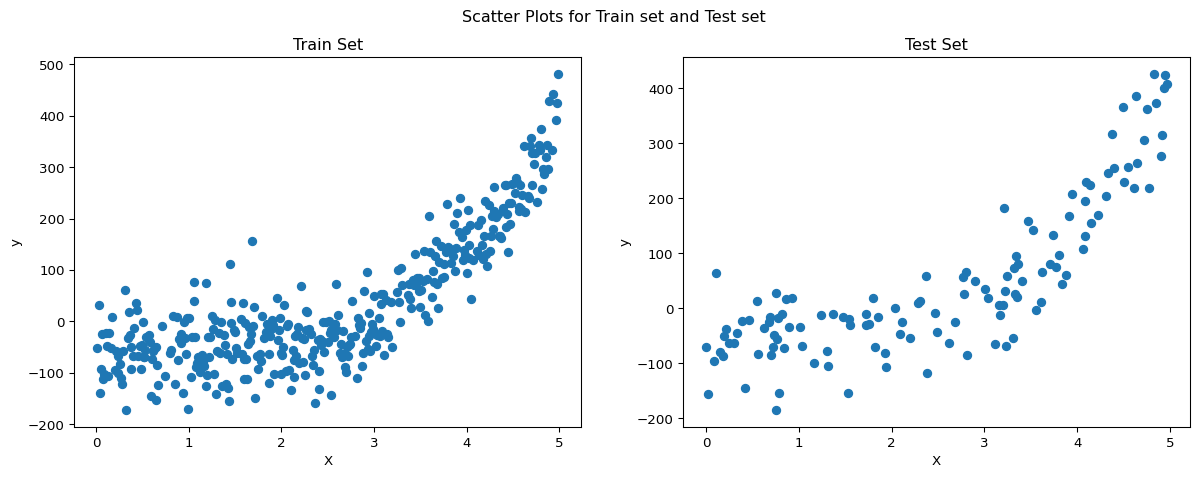

In [ ]:
# Split X and y into train and test set and plot them.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# plot train and test set using subplots
fig, axis= plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5), dpi = 96)

axis[0].scatter(X_train, y_train)
axis[0].set(title = 'Train Set', xlabel = 'X', ylabel = 'y')

axis[1].scatter(X_test, y_test)
axis[1].set(title = 'Test Set', xlabel = 'X', ylabel = 'y')

fig.suptitle('Scatter Plots for Train set and Test set')
plt.show()

You can also create similar subplots by using tuple unpacking for multiple axes.

Examples:

**1. `fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)`**

Here,
- `ax1` will be used to get an axis at first row, first column.
- `ax2` will be used to get an axis at second row, first column.

**2. `fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2)`**

Here,
- `ax1` will be used to get an axis at first row, first column.
- `ax2` will be used to get an axis at first row, second column.
- `ax3` will be used to get an axis at second row, first column.
- `ax4` will be used to get an axis at second row, second column.

You can visualise `((ax1, ax2), (ax3, ax4))` as

```
[[ax1, ax2],
 [ax3, ax4]]
```


Let us create the scatter plots for train and test sets again using this approach.

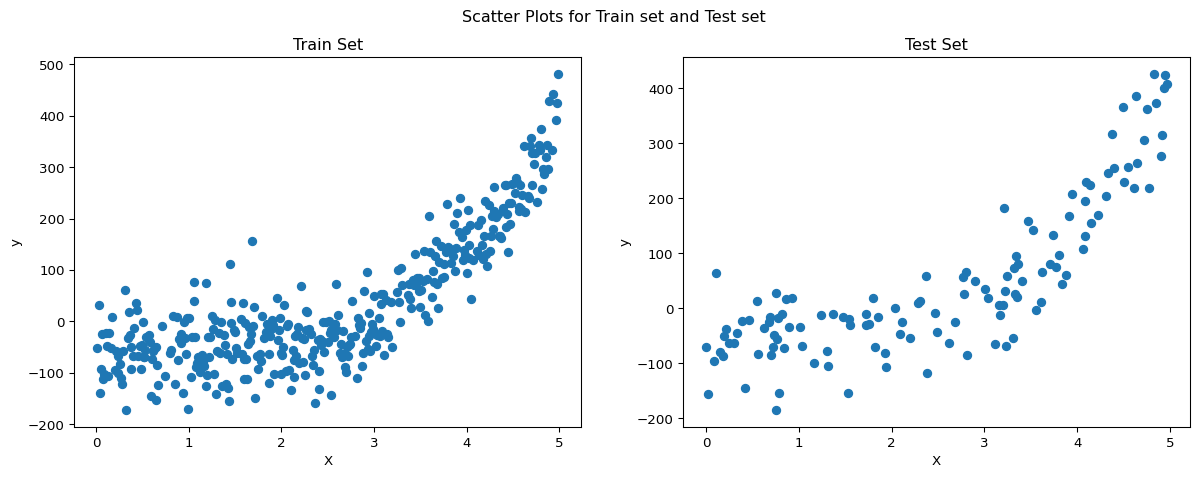

In [ ]:
# plot train and test set using tuple unpacking
fig, (ax1, ax2)= plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5), dpi = 96)

ax1.scatter(X_train, y_train)
ax1.set(title = 'Train Set', xlabel = 'X', ylabel = 'y')

ax2.scatter(X_test, y_test)
ax2.set(title = 'Test Set', xlabel = 'X', ylabel = 'y')

fig.suptitle('Scatter Plots for Train set and Test set')
plt.show()


Now let's build and fit a Linear Regression model to this dataset. Also, evaluate the accuracy of this model with $R^2$ score and plot the predicted values for the train set.  

In [ ]:
X_train

In [ ]:
X_train_reshaped = X_train.reshape(-1, 1)
X_train_reshaped

array([[2.27],
       [4.17],
       [2.03],
       [1.26],
       [3.29],
       [0.31],
       [1.13],
       [4.7 ],
       [2.71],
       [1.4 ],
       [0.57],
       [1.92],
       [0.24],
       [0.17],
       [2.65],
       [0.66],
       [2.08],
       [4.79],
       [0.94],
       [2.53],
       [2.66],
       [0.23],
       [2.22],
       [2.61],
       [4.26],
       [0.05],
       [1.16],
       [0.45],
       [0.16],
       [4.62],
       [3.57],
       [0.03],
       [2.18],
       [4.05],
       [0.6 ],
       [1.1 ],
       [3.18],
       [4.28],
       [0.29],
       [4.37],
       [4.71],
       [0.26],
       [0.07],
       [4.53],
       [1.08],
       [0.37],
       [1.57],
       [4.89],
       [1.18],
       [1.14],
       [1.75],
       [3.73],
       [1.81],
       [1.44],
       [3.69],
       [3.9 ],
       [1.95],
       [4.04],
       [2.75],
       [4.54],
       [1.41],
       [3.65],
       [0.67],
       [2.1 ],
       [1.68],
       [4.93],
       [3.

The R-squared score of Linear model for Train Set is 0.6470



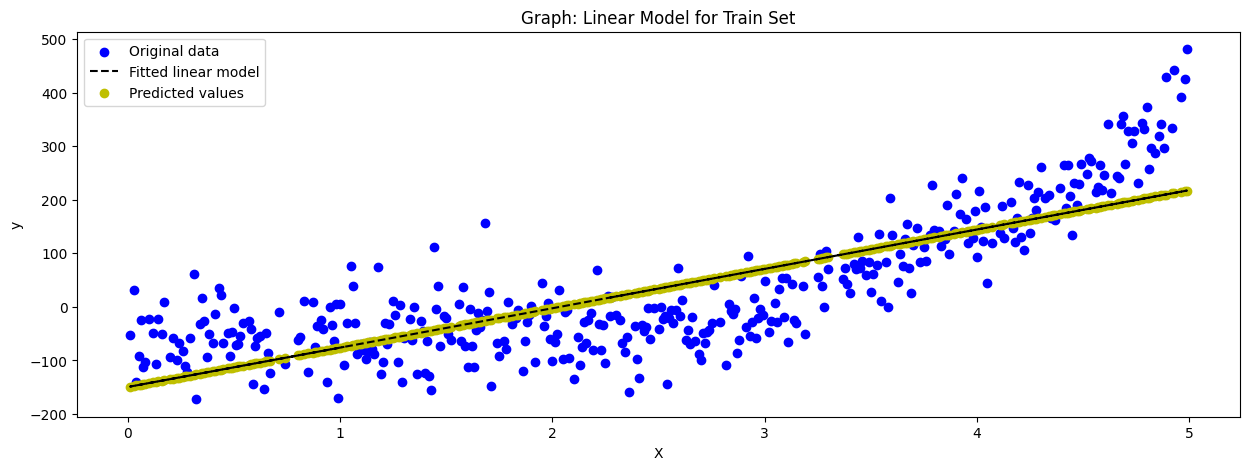

In [ ]:
#  Create and deploy the Linear Regression model.
# Plot the predicted values and actual values for train set.

# Import the required modules.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create the Linear Regression model and train the model.
X_train_reshaped = X_train.reshape(-1, 1)

linear_model = LinearRegression()
linear_model.fit(X_train_reshaped, y_train)

y_train_pred = linear_model.predict(X_train_reshaped)

# Print the R-squared value.
print(f"The R-squared score of Linear model for Train Set is {r2_score(y_train, y_train_pred):.4f}\n")

# Plot the predictions for train set.
plt.figure(figsize = (15, 5))
plt.title("Graph: Linear Model for Train Set")
plt.scatter(X_train, y_train, label = f"Original data", color = "b")
plt.plot(X_train, y_train_pred, label = f"Fitted linear model", color = "black", linestyle = '--')
plt.scatter(X_train, y_train_pred , label = f"Predicted values", color = "y")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In the above output, you can see that the regression line is fairly far from the dataset. Predictions are in the black straight line and blue points are actual values.

Also the $R^2$ is very low. Thus, such model will probably make a lot of wrong predictions.

Let us predict and plot the values for test set and observe the results.





The R-squared score of Linear model for Test Set is 0.6496


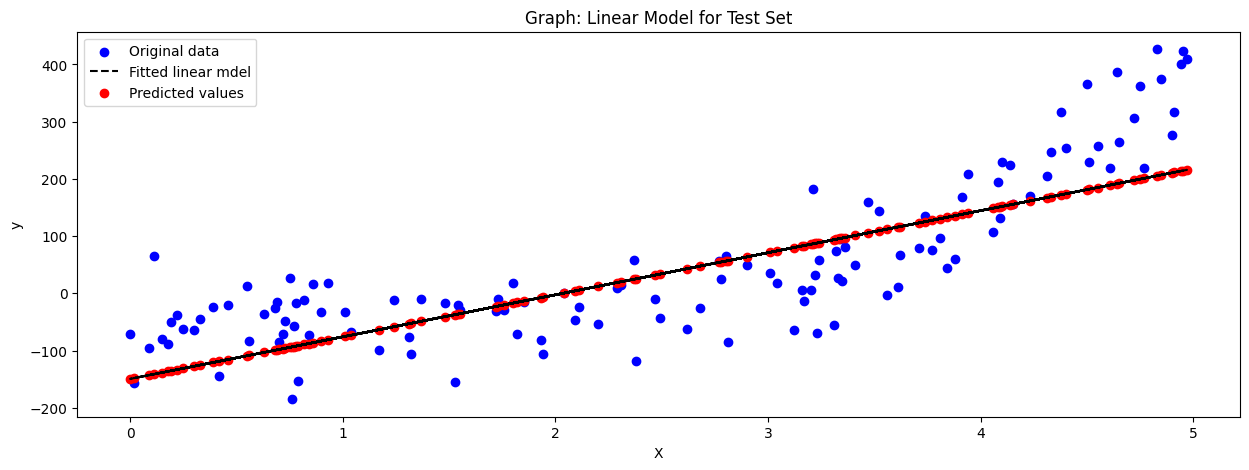

In [ ]:
#  Predict and plot values for test set
X_test_reshaped = X_test.reshape(-1, 1)

y_test_pred = linear_model.predict(X_test_reshaped)

# Print the R-squared value.
print(f"The R-squared score of Linear model for Test Set is {r2_score(y_test, y_test_pred):.4f}")

# Plot the predictions for test set.
plt.figure(figsize = (15, 5))
plt.title("Graph: Linear Model for Test Set")
plt.scatter(X_test, y_test, label = f"Original data", color = "b")
plt.plot(X_test, y_test_pred, label = f"Fitted linear mdel", color = "black", linestyle = '--')
plt.scatter(X_test, y_test_pred , label = f"Predicted values", color = "r")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

As you can observe, again the linear regression model is not able to fit the test data properly as the line is not capturing the relationship between feature and target arrays.

Also, the $R^2$ score  for test features is also very low. This is an example of underfitting.

We can summarises that the Linear Regression model can only make linear predictions. That means that it is unable to predict the accurate values when the relationship between independent and dependent variables is non-linear.

We can avoid underfitting by:
- Increasing the training time of the model.
- Increasing the number of features to train the model.
- Simply change the algorithm to create the model.

In our case, we will overcome underfitting with the help of Polynomial Regression. Let us first understand what is Polynomial Regression.


----

####Activity 2: Polynomial Regression

Polynomial Regression is also known as an extension of Linear Regression.
It is used to overcome the underfitting problem in Linear Regression.

Let's start with the equation of Linear Regression,

$$Y = \beta_0 + \beta_1 x  \tag{1}$$

where

- $x$  is independent variable or feature.

- $Y$ is the response to the independent variable (or predicted value or dependent variable).

- $\beta_0, \beta_1$ are the corresponding regression coefficients.

The equation $(1)$ is a first order or a first degree polynomial.

In Polynomial Regression, the input $x$ is raised to higher powers to  transform equation $(1)$  into:

$$Y = \beta_0 + \beta_1 x + \beta_2 x^2 +  \beta_3 x^3 + \dots + \beta_n x^n  \tag{2}$$

here,

- $x^2, x^3, \dots, x^n$ are the higher orders of the feature $x$ to transform the linear line into a curve.

For example,

$$Y = \beta_0 + \beta_1 x + \beta_2 x^2  \tag{3}$$

The function $(3)$  is a quadratic or second degree polynomial function. We can extend the function by increasing its degree.

Similarly, we could also use  a third-order or a third-degree polynomial that has the form:
 $$Y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3  \tag{4}$$

The higher the orders get, the more complex curves you can represent.

We can use `PolynomialFeatures` class of the `sklearn.preprocessing` module to convert the independent features into their higher orders.

**Syntax:** `PolynomialFeatures(degree, include_bias)`

  where,
  - `degree`: The degree of the polynomial features and is initialised as `2` by default.

  - `include_bias`: If `True` (default) , then includes a bias column. The bias column is a column in which all the polynomial powers are zero, i.e., a column of ones. This column acts an intercept term in a linear model.

**What is bias?**

While exploring machine learning algorithms, we will often come across the term "bias".

*Bias is how far off the model predictions are from
the correct values. Are they more or less on the right spot? Or are the errors in the prediction consistently skewed in a particular direction?* If yes, then we can say that our predictions are ***biased*** in a certain direction.

Here, bias is a variable whose power is zero.

For example, if there is a single variable $x$ then the possible combinations for $x$ would be:
-  $\{x^0, x^1, x^2\}$  for  degree `2`.
-  $\{x^0, x^1, x^2, x^3\}$ for degree `3`.

Here, $x^0$ i.e. $1$ is called bias. Thus, the `include_bias` attribute allows us to include or exclude this bias in the final higher order feature matrix.

Let's convert the independent variable `X` to its high power values using the `PolynomialFeatures` class.

**Steps:**

1. Create an object of `PolynomialFeatures` class and pass the desired degree as an input to its constructor.  

2. Call the `fit_transform()` function using the object of `PolynomialFeatures` class.

In [ ]:
#Convert the 'X_train' feature variable to fit polynomial expression with 'degree = 1'

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 1)
X_poly1 = poly_features.fit_transform(X_train_reshaped)
print(f"First five values of 'X' array: {X_train[:5]}")
print(f"Transformed values of 'X' with degree = 1: \n{X_poly1[:5]}")

First five values of 'X' array: [2.27 4.17 2.03 1.26 3.29]
Transformed values of 'X' with degree = 1: 
[[1.   2.27]
 [1.   4.17]
 [1.   2.03]
 [1.   1.26]
 [1.   3.29]]


In the output, we obtained a new matrix having $x^0$ and  $x^1$ features for a 1-degree polynomial. The first column is the bias column and the second column represents the original features since `degree = 1`.

Thus,

- $[x]$ will be transformed into $[1, x]$ for degree `1`.
- $[x]$ will be transformed into $[1, x, x^2]$ for degree `2`.
- $[x]$ will be transformed into $[1, x, x^2, x^3]$ for degree `3`

  and so on.

So let's move ahead and convert the feature variable `X_train` to `degree = 2` polynomial.

**Note:**  As we are using linear regression model after obtaining higher order polynomials, we can keep `include_bias = False`. This is because, the linear regression model by default takes care of adding a column containing 1s, so there is no need to add it again in `PolynomialFeatures` array.

In [ ]:
# Convert the 'X_train' feature variable to fit polynomial expression with 'degree = 2'
poly_features = PolynomialFeatures(degree = 2, include_bias = True)
X_train_poly = poly_features.fit_transform(X_train_reshaped)
print(f"First five values of 'X_train' array: {X_train[:5]}")
print(f"Transformed values of 'X_train' with degree = 2: \n{X_train_poly[:5]}")

First five values of 'X_train' array: [2.27 4.17 2.03 1.26 3.29]
Transformed values of 'X_train' with degree = 2: 
[[ 1.      2.27    5.1529]
 [ 1.      4.17   17.3889]
 [ 1.      2.03    4.1209]
 [ 1.      1.26    1.5876]
 [ 1.      3.29   10.8241]]


**Note:** The bias column i.e. column containing 1s is not displayed in the above matrix as `include_bias` is set to `False`.

The ouput array created with `degree = 2` polynomial object has 2 columns where:
- First column is the original feature.
- Second column is the new high order feature which is the square value of the original feature.

Thus, we obtained all possible combinations of the feature $X$ with `degree = 2` i.e. $[X, X^2]$

We can also verify whether the second column is the square of the first column by calculating their squares using the conventional method.

In [ ]:
#Calculate the square of first five 'X_train' values.
print(f'Square of first five X_train values:')
for x in X_train[:5]:
  print(x ** 2)

Square of first five X_train values:
5.1529
17.3889
4.120900000000001
1.5876000000000001
10.8241


You may notice that we get the same values as obtained with the `PolynomialFeatures` class. Hence, the expression obtained will be a quadratic function i.e. a polynomial with `degree = 2` as shown below:

$$Y = \beta_0 + \beta_1 x + \beta_2 x^2 $$


Let us now fit a linear regression model on the transformed features and observe the $R^2$ score and the relationship graph.

The R-squared score of the model is 0.8343



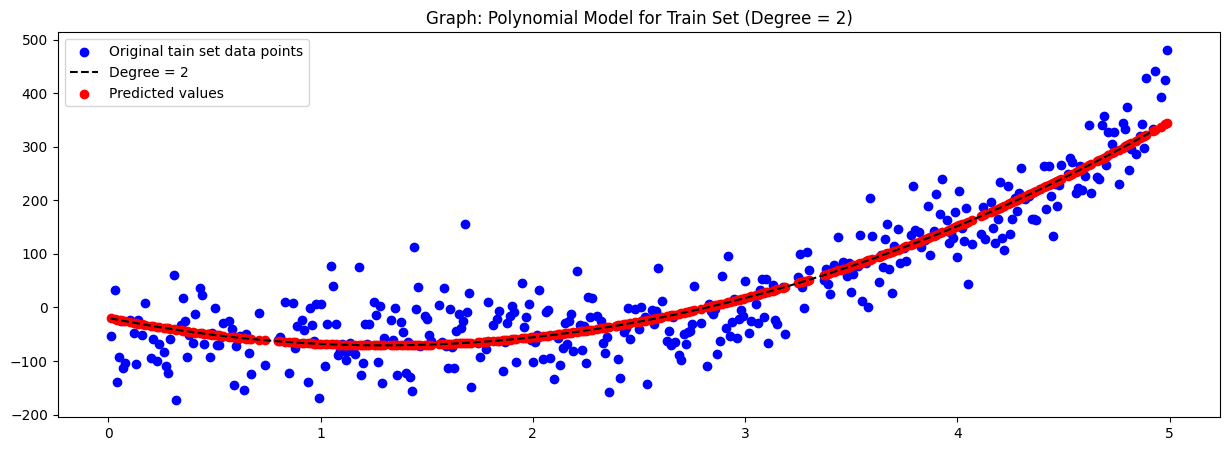

In [ ]:
#Create a Linear Regression model with feature values in 'X_train_poly' array to predict 'y_train'

# Train the Linear Regression model using high order polynomial
poly_model = LinearRegression()

poly_model.fit(X_train_poly, y_train)

# Make Predictions for the train set.
y_train_predict = poly_model.predict(X_train_poly)

# Evaluate the model accuracy with R-square metrics.
print(f"The R-squared score of the model is {r2_score(y_train, y_train_predict):.4f}\n")

# Create a new array to plot 'X_train' for smoother curve.
X_train_grid = np.arange(min(X_train), max(X_train), 0.1)
X_train_grid = X_train_grid.reshape(len(X_train_grid), 1)

# Plot the predicted values.
plt.figure(figsize = (15, 5))
plt.title("Graph: Polynomial Model for Train Set (Degree = 2)")
plt.scatter(X_train, y_train, label = f"Original tain set data points", color = "b")
plt.plot(X_train_grid, poly_model.predict(poly_features.fit_transform(X_train_grid)),
         label = f"Degree = 2", color = "black" , linestyle = '--')
plt.scatter(X_train, y_train_predict, label = f"Predicted values", color = "r")
plt.legend()
plt.show()

It is quite evident from the plot that the quadratic
curve is able to fit the data better than the linear line. Also the $R^2$ score has increased from `0.6470` (linear model) to `0.8343` (second order polynomial model).

Let us also predict the values for test set and plot the predictions using the steps given below:

1. Convert the feature array `X_test` into second order polynomial matrix.
2. Predict the values for the transformed test set  using the linear regression model `poly_model` created and trained in the above code cell.
3. Calculate the $R^2$ score for the test set.
5. Plot the predicted values for the test set.


The R-squared score of the model is 0.8362



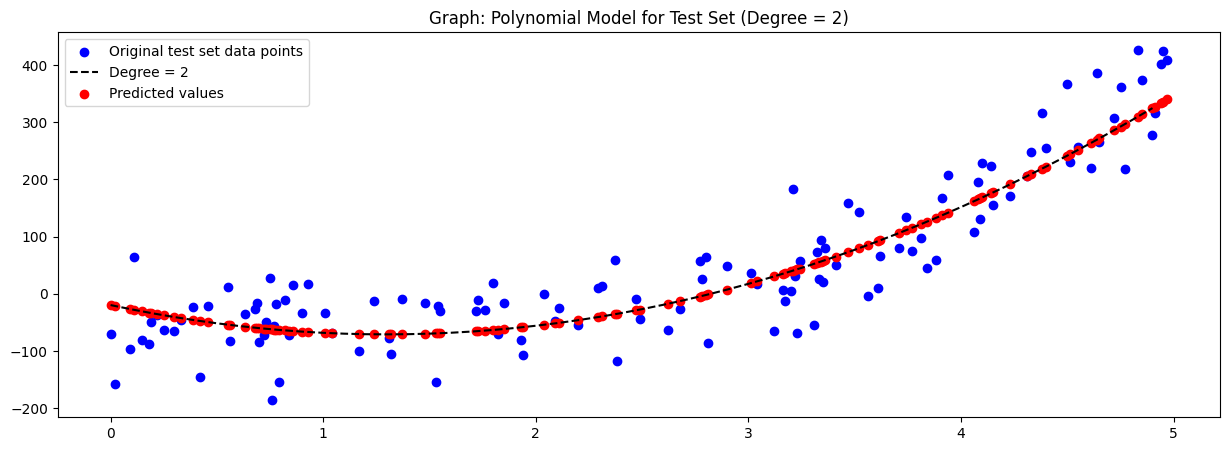

In [ ]:
# Transform the test set feature into degree 2 polynomial feature.
# Predict the values for the transformed features and plot the predicted values.

X_test_poly = poly_features.fit_transform(X_test_reshaped)
# Make Predictions for the test set.
y_test_predict = poly_model.predict(X_test_poly)

# Evaluate the model accuracy with R-square metrics.
print(f"The R-squared score of the model is {r2_score(y_test, y_test_predict):.4f}\n")

# Create a new array 'X_test_grid' for smoother curve.
X_test_grid = np.arange(min(X_test), max(X_test), 0.1)
X_test_grid = X_test_grid.reshape(len(X_test_grid), 1)

# Plot the predicted values.
plt.figure(figsize = (15,5))
plt.title("Graph: Polynomial Model for Test Set (Degree = 2)")
plt.scatter(X_test, y_test, label = f"Original test set data points", color = "b")
plt.plot(X_test_grid, poly_model.predict(poly_features.fit_transform(X_test_grid)),
         label = f"Degree = 2", color = "black" , linestyle = '--')
plt.scatter(X_test, y_test_predict , label = f"Predicted values", color = "r")
plt.legend()
plt.show()

As you can see, the predicted target values for test set are close to the actual target values. Also, the $R^2$ score has improved significantly from `0.6496` to `0.8362` for the test set which shows that second order polynomial model is performing better than the linear model.

Similarly, we can obtain a more accurate model by increasing the degree of polynomial.

Let us define a function `polynomial_regression()` that transforms the original features into polynomial features of desired `degree` and then applies Linear Regression on it. This function should accept `degree` as input.

Perform the following tasks inside `polynomial_regression()` function:

1. Create an object of `PolynomialRegression` class and pass `degree` as input to its constructor.

2. Call the `fit_transform()` function for train set and test set using the object of `PolynomialRegression` class to obtain  polynomial features of the inputted `degree`.

3. Train a linear regression model using the high order polynomial train set.

4. Predict the values for the transformed train and test sets  using the linear regression model created.

5. Calculate and print the $R^2$ score for both train and test set.

6. Plot the predicted values for the train and test set within one figure using the `subplot()` function.

In [ ]:
#  Create a function that accepts degree as input and plots the predictions for high order polynomials.
def polynomial_regression(degree):
  # Obtain high order polynomial feature for train and test set.
  poly_features = PolynomialFeatures(degree = degree, include_bias = False)

  X_train_poly = poly_features.fit_transform(X_train_reshaped)
  X_test_poly = poly_features.fit_transform(X_test_reshaped)

  # Fit the linear regression using high order train set features.
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)

  # Make predictions for train and test set.
  y_train_predict = poly_model.predict(X_train_poly)
  y_test_predict = poly_model.predict(X_test_poly)

  # Calculate and print R-squared score for train and test set.
  r2_train = r2_score(y_train, y_train_predict)
  r2_test = r2_score(y_test, y_test_predict)

  print(f"R-squared score of training set for degree {degree}: {r2_train:.4f}")
  print(f"R-squared score of test set for degree {degree}: {r2_test:.4f}")

  # plot the predictions for train and test set using subplots.
  X_train_grid = np.arange(min(X_train), max(X_train), 0.1)
  X_train_grid = X_train_grid.reshape(len(X_train_grid), 1)

  X_test_grid = np.arange(min(X_test), max(X_test), 0.1)
  X_test_grid = X_test_grid.reshape(len(X_test_grid), 1)

  # plot train and test set using subplots
  fig, (ax1, ax2)= plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5), dpi = 96)

  ax1.set(title = 'Train Set', xlabel = 'X', ylabel = 'y')
  ax1.scatter(X_train, y_train, label = f"Original train set data points", color = "b")
  ax1.plot(X_train_grid, poly_model.predict(poly_features.fit_transform(X_train_grid)),
           label = f"Degree = {degree}", color = "black" , linestyle = '--'
           )
  ax1.scatter(X_train, y_train_predict , label = f"Predicted values", color = "r")
  ax1.legend()

  ax2.set(title = 'Test Set', xlabel = 'X', ylabel = 'y')
  ax2.scatter(X_test, y_test)
  ax2.plot(X_test_grid, poly_model.predict(poly_features.fit_transform(X_test_grid)),
           label = f"Degree = {degree}", color = "black" , linestyle = '--'
           )
  ax2.scatter(X_test, y_test_predict , label = f"Predicted values", color = "r")
  ax2.legend()

  fig.suptitle('Predictions for Train set and Test set')
  plt.show()

Now that we have created the `polynomial_regression()` function, it will be very convenient for us to visualise the polynomial regression model for any desired degree.

Let us visualise the third order polynomial regression model by passing `3` as input to the `polynomial_regression()` function.

R-squared score of training set for degree 3: 0.8477
R-squared score of test set for degree 3: 0.8537


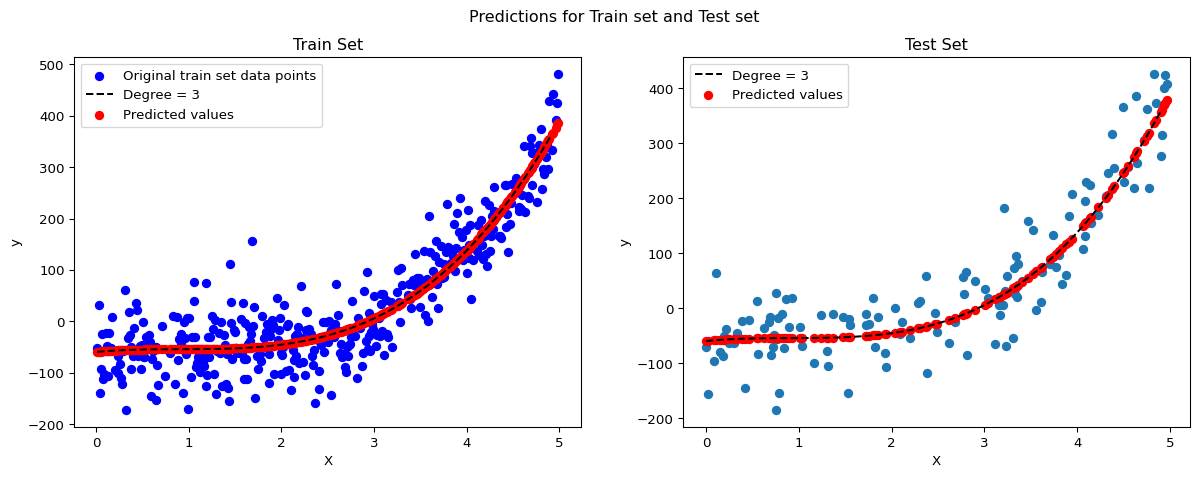

In [ ]:
# Call the 'polynomial_regression()' function and pass 3 as input.
polynomial_regression(3)

You may notice that we obtained a more accurate model for third degree polynomial, as the $R^2$ score is better than the second order polynomial model for the test set.


Similarly, visualise the regression curve for 4 and 5-degree polynomial regression model by passing `4` and `5` as inputs to the `polynomial_regression()` function.

R-squared score of training set for degree 4: 0.8483
R-squared score of test set for degree 4: 0.8540


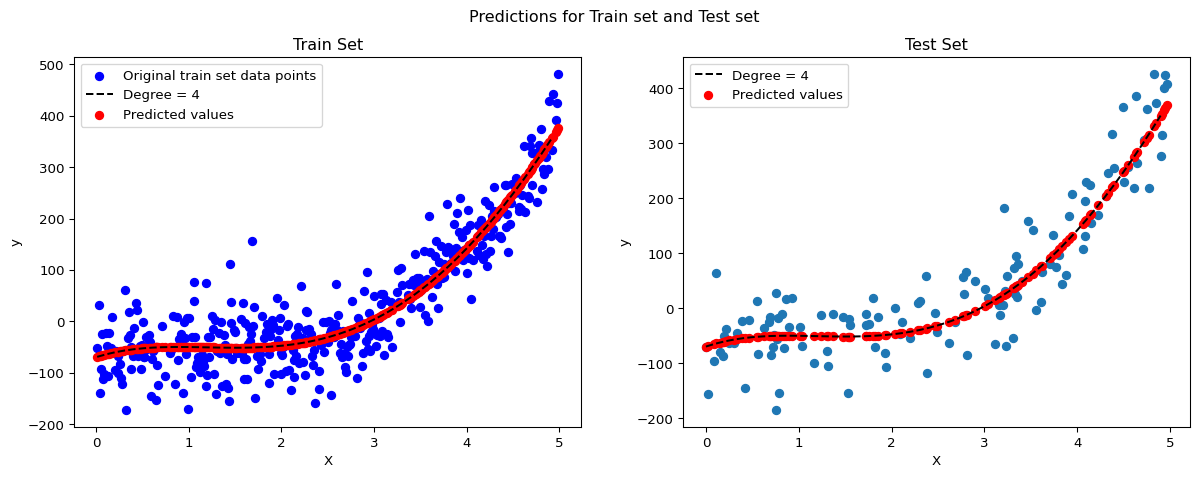

R-squared score of training set for degree 5: 0.8485
R-squared score of test set for degree 5: 0.8539


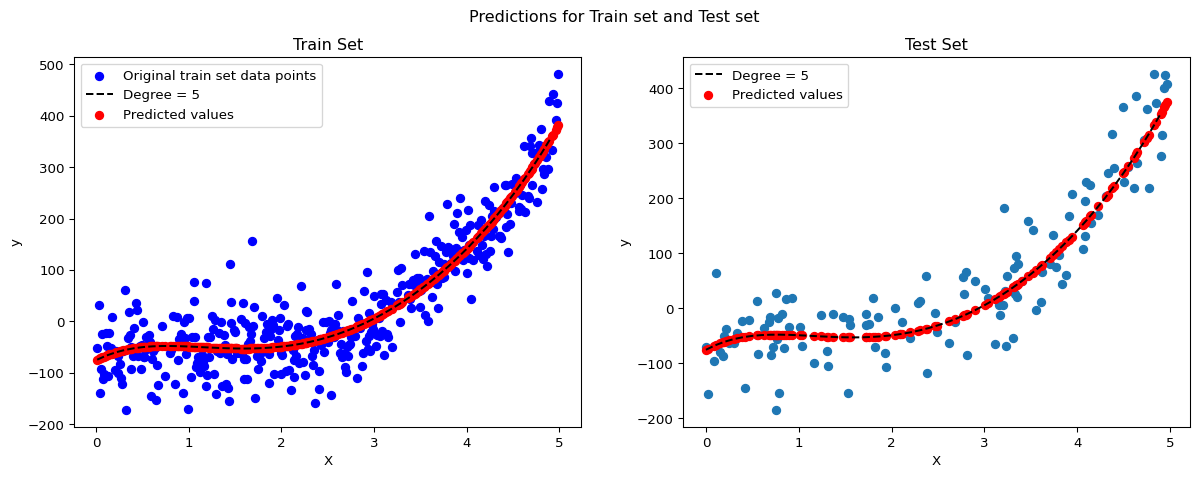

In [ ]:
# Visualise the poylnomial model for degree 4 and 5.
polynomial_regression(4)
polynomial_regression(5)

In this way, as we move ahead and increase the degree of the polynomial we will be able to detect the exact trend or pattern in the original data with the help of Polynomial Regression.


But wait, do we want the model to detect the exact trend or pattern in the original data? The answer is no. It can cause **Overfitting**.

Let's understand overfitting in more detail.

---

####Activity 3: Overfitting

**Overfitting** happens when the model learns every pattern in the training data.

In the real world, along with the data we have noise and some inaccurate values. And if the model is trained to capture all the details, it will also capture these inaccurate values causing the model to overfit.

Overfitting the model, hence, will decrease the efficacy of the model for the unseen or the test data.

Let's convert the feature variable `X_train` to `degree = 15` polynomial i.e. a higher order polynomial by calling the `polynomial_regression()` function with `15` as input.

R-squared score of training set for degree 15: 0.8591
R-squared score of test set for degree 15: 0.8400


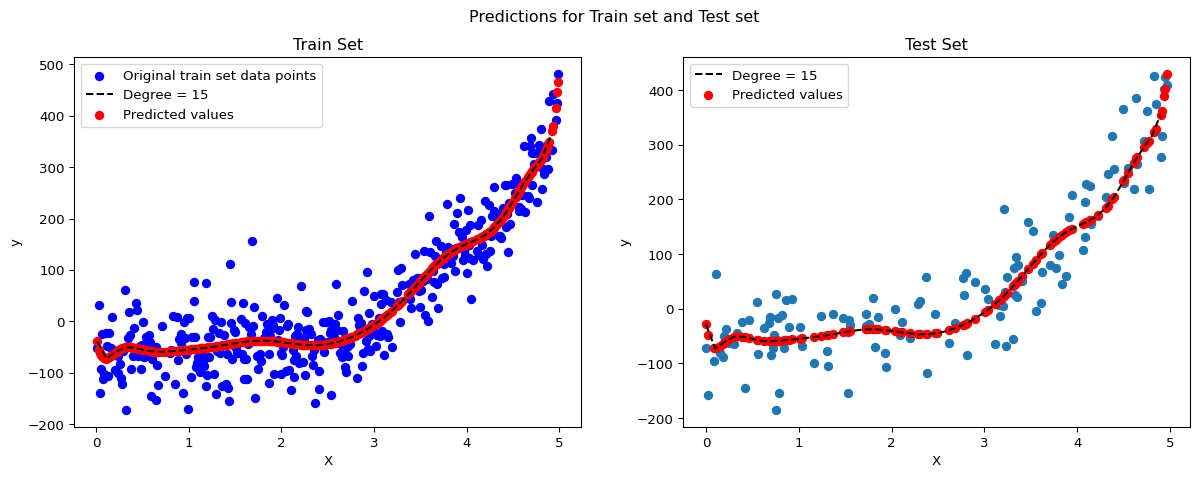

In [ ]:
# Visualise the poylnomial model for degree 15.
polynomial_regression(15)

From the above output, we can observe that:
- The model tries to learn too much from the training data to an extent that it is also learning the noise in the data. This negatively impacts the model performance on the new data or test data.
- The model is capturing lot of noise while predicting values for  test data. This is clearly visible in the test data graph.
- The $R^2$ score of the train set keeps increasing but for the test set, it has declined significantly (from `0.8539` for degree `5` to `0.8400` for degree `15`) which is a clear indication that the model is not performing well for the test set.

**Conclusion:**

The regression line, since overfitted on the train data, is not flexible enough to find the trend in the test data. Thus, the test data predictions are not accurate. Hence overfitting the model is not recommended.

Therefore to implement polynomial regression, we have to select the degree of the polynomial expression carefully.

**How to select the degree of polynomial to avoid Overfitting?**

The clear sign of overfitting is when the model accuracy is high in the training set, but the accuracy drops significantly in the test set. This means the model knows the training data very well, but cannot generalise.

Hence, the most appropriate degree of polynomial for fitting data would be the one after which the model's accuracy starts reducing for the test set. Let us try to identify this degree of polynomial after which the model starts overfitting.

Create a `calculate_r2()` function to calculate the $R^2$ scores for train and test sets. This function must accept `degree` as input. Inside this function:
  1. Create an object of `PolynomialRegression` class and pass `degree` as input to its constructor.
  2. Call the `fit_transform()` function for train set and test set using the object of `PolynomialRegression` class.
  3. Train a linear regression model using the high order polynomial train set.
  4. Predict the values for the transformed train and test sets  using the linear regression model created.
  5.Calculate and return $R^2$ scores of both train and test set.



In [ ]:
#Create a function that accepts degree as input and returns the r2 score of train and test sets.
def calculate_r2(degree):
  # Obtain high order polynomial feature for train and test set.
  poly_features = PolynomialFeatures(degree = degree, include_bias = False)

  X_train_poly = poly_features.fit_transform(X_train_reshaped)
  X_test_poly = poly_features.fit_transform(X_test_reshaped)

  # Fit the linear regression using high order train set features.
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)

  # Make predictions for train and test set.
  y_train_predict = poly_model.predict(X_train_poly)
  y_test_predict = poly_model.predict(X_test_poly)

  # Calculate the R-squared score for train and test set.
  r2_train = r2_score(y_train, y_train_predict)
  r2_test = r2_score(y_test, y_test_predict)

  return r2_train, r2_test

Now that we have created a function that will return the $R^2$ scores for the desired degree, we will create a line plot with degree of polynomial on $X$-axis and $R^2$ scores obtained for those degrees on $Y$-axis.


Follow the steps given below to calculate and plot the $R^2$ scores for degrees from `1` to `30` for train and test sets:
1. Create two empty lists `r2_train_list` and `r2_test_list` for storing the $R^2$ scores of train and test sets respectively.
2. Initiate a `for` loop that iterates from `1` to `30`. Inside this `for` loop,
  - Call the `calculate_r2()` function and pass the iterator `deg` as input to this function. This function will return $R^2$ scores of train and test sets for the passed iterator `deg`.
  - Store the returned values of `calculate_r2()` function in two separate variables and append them to the list `r2_train_list` and `r2_test_list` respectively.
3. Plot the line plots for train and test sets with degrees from `1` to `30` on $X$-axis and the $R^2$ scores stored in the list on $Y$-axis.

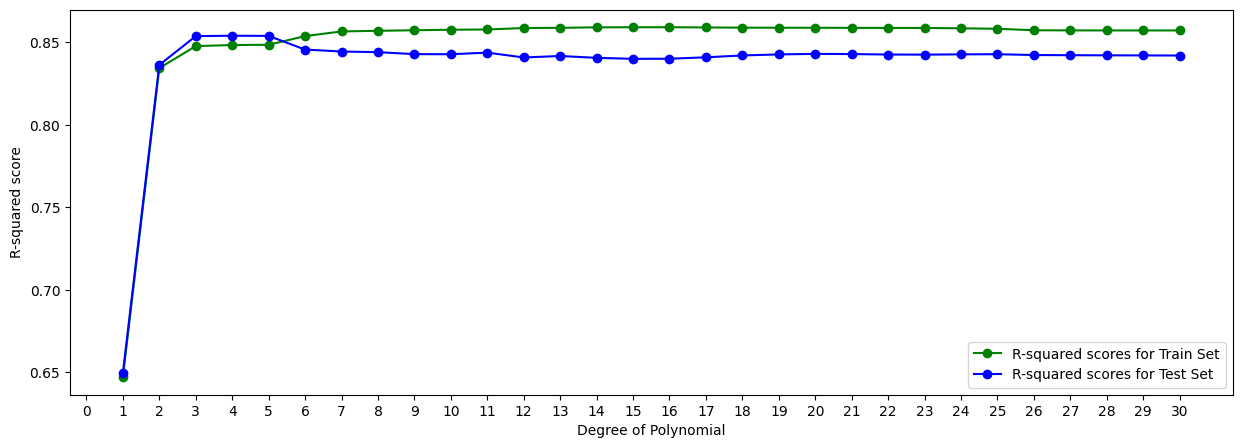

In [ ]:
#  Visualise the relation between degrees of polynomial and the corresponding R-squared scores for those degrees.
# Store the R-squared scores of train and test sets for degrees 1-30
r2_train_list =[]
r2_test_list = []
for deg in range(1, 31):
  r2_score_train, r2_score_test = calculate_r2(deg)
  r2_train_list.append(r2_score_train)
  r2_test_list.append(r2_score_test)

# Plot the degrees from 1- 30 on X-axis and R-squared scores for these degrees on Y-axis.
plt.figure(figsize = (15,5))
plt.xticks(np.arange(0, 31, 1))
plt.xlabel("Degree of Polynomial")
plt.ylabel("R-squared score")
plt.plot(np.arange(1,31), r2_train_list, color ='g', marker = 'o', label='R-squared scores for Train Set')
plt.plot(np.arange(1,31), r2_test_list, color ='b', marker = 'o', label='R-squared scores for Test Set')
plt.legend()
plt.show()

From the graph, it is clearly visible that as the degree of polynomial increases, the $R^2$ score for train set remains stable but it starts declining for the test set. This is an indication of overfitting.

Let us find out after which degree the $R^2$ score starts declining for the test set. For this, we will do some additions in the `for` loop created above and the remaining code remains same.

1. Create a variable `stop_degree` and set it to `None`. This variable will store the degree for which $R^2$ score is highest for the test set.

2. Create two empty lists `r2_train_list` and `r2_test_list` for storing the $R^2$ scores of train and test sets respectively.
2. Initiate a `for` loop that iterates from `1` to `30`. Inside this `for` loop,
  - Call the `calculate_r2()` function and pass the iterator `deg` as input to this function. This function will return $R^2$ scores of train and test sets.
  - Store the returned values of `calculate_r2()` function in two separate variables and append them to the list `r2_train_list` and `r2_test_list` respectively.
  - If the iterator `deg` is greater than or equal to `2`:
    - Check whether the $R^2$ score of the current degree is less than the previous $R^2$ score of the previous degree.
    - If yes, this means that the $R^2$ scores have started dropping.
    - Check if `stop_degree` is `None`. If yes, then store the previous degree in `stop_degree` variable. Thus the `stop_degree` variable holds the degree after which $R^2$ scores started declining.
3. Plot the line plots for train and test sets with degrees from `1` to `30` on $X$-axis and the $R^2$ scores stored in the list on $Y$-axis.
4. Also render the `stop_degree` variable on graph by plotting vertical line using `axvline()` function of `matplotlib.pyplot` module.

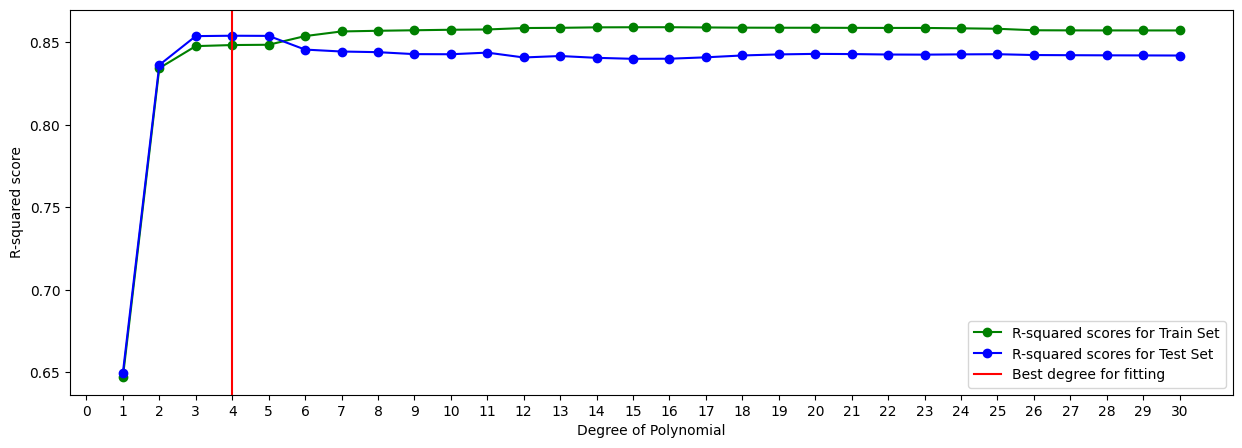

In [ ]:
#  Determine the degree after which R-squared scores started declining for test set.
# Store the r2 scores of train and test sets for degrees 1-30. Create 'stop_degree' variable
r2_train_list =[]
r2_test_list = []
stop_degree = None

# Determine the degree after which R-squared score of the test set starts dropping.
for deg in range(1, 31):
  r2_score_train, r2_score_test = calculate_r2(deg)
  r2_train_list.append(r2_score_train)
  r2_test_list.append(r2_score_test)

  if deg >= 2:
    if r2_test_list[deg - 1] < r2_test_list[deg -2]:
      if stop_degree is None:
        stop_degree = deg - 1


# Plot the degrees from 1- 30 on X-axis and R-squared scores for these degrees on Y-axis.
# Also plot the 'stop_degree' as a vertical line.
plt.figure(figsize = (15,5))
plt.xticks(np.arange(0, 31, 1))
plt.xlabel("Degree of Polynomial")
plt.ylabel("R-squared score")
plt.plot(np.arange(1,31), r2_train_list, color ='g', marker = 'o', label='R-squared scores for Train Set')
plt.plot(np.arange(1,31), r2_test_list, color ='b', marker = 'o', label='R-squared scores for Test Set')
plt.axvline(x = stop_degree, color = 'r', label = "Best degree for fitting")
plt.legend()
plt.show()

In the above graph, we can observe that the $R^2$ score for the test set starts declining slightly after `stop_degree` value i.e. after `degree = 4`. Also, it starts declining drastically after degree `5`. Hence, we might overfit the model if we consider a degree higher than `4` or `5`.

Thus, training this dataset with fourth order polynomial  will be the best fit and also prevent overfitting. It prevents underfitting too by training the  data enough.


